In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data/titanic.csv")

In [3]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
dtype: int64

In [4]:
msk = numpy.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]
print('total:',len(df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1308 train: 1033 test: 275


In [5]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_Features=minmax_scale.fit_transform(train_Features)  
test_Features=minmax_scale.fit_transform(test_Features)

In [6]:
train_Features[355:359]

array([[0.5       , 1.        , 0.48532708, 0.02513033],
       [0.5       , 1.        , 0.82392769, 0.02410559],
       [0.5       , 1.        , 0.67494342, 0.05074862],
       [0.5       , 0.        , 0.56659123, 0.05074862]])

In [7]:
train_Label[:4]

array([1., 1., 0., 0.])

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Embedding(input_dim=4,output_dim=1))

In [11]:
model.add(SimpleRNN(units=4))

In [12]:
model.add(Dense(1, activation = "sigmoid"))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 1)           4         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [15]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 929 samples, validate on 104 samples
Epoch 1/30
 - 2s - loss: 0.6739 - acc: 0.5974 - val_loss: 0.6373 - val_acc: 0.7404
Epoch 2/30
 - 0s - loss: 0.6563 - acc: 0.5985 - val_loss: 0.6017 - val_acc: 0.7404
Epoch 3/30
 - 0s - loss: 0.6393 - acc: 0.5985 - val_loss: 0.5730 - val_acc: 0.7404
Epoch 4/30
 - 0s - loss: 0.6183 - acc: 0.5985 - val_loss: 0.5446 - val_acc: 0.7404
Epoch 5/30
 - 0s - loss: 0.5934 - acc: 0.7234 - val_loss: 0.5155 - val_acc: 0.7404
Epoch 6/30
 - 0s - loss: 0.5663 - acc: 0.7836 - val_loss: 0.4934 - val_acc: 0.7404
Epoch 7/30
 - 0s - loss: 0.5431 - acc: 0.7836 - val_loss: 0.4747 - val_acc: 0.7404
Epoch 8/30
 - 0s - loss: 0.5260 - acc: 0.7836 - val_loss: 0.4625 - val_acc: 0.7404
Epoch 9/30
 - 0s - loss: 0.5144 - acc: 0.7696 - val_loss: 0.4563 - val_acc: 0.8077
Epoch 10/30
 - 0s - loss: 0.5074 - acc: 0.7740 - val_loss: 0.4517 - val_acc: 0.8077
Epoch 11/30
 - 0s - loss: 0.5029 - acc: 0.7740 - val_loss: 0.4492 - val_acc: 0.8077
Epoch 12/30
 - 0s - loss: 0.5001 - acc:

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

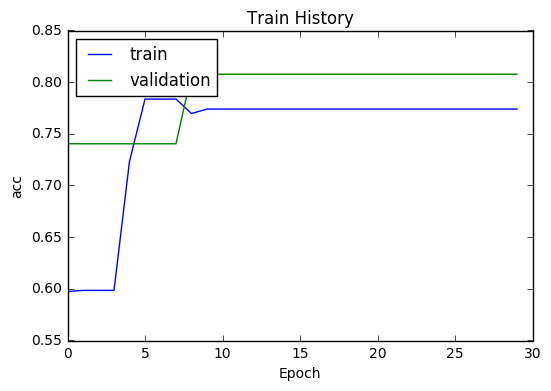

In [17]:
show_train_history(train_history,'acc','val_acc')

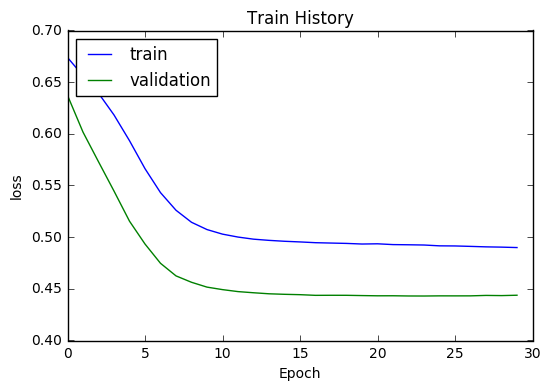

In [18]:
show_train_history(train_history,'loss','val_loss')

In [19]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 81us/step


In [20]:
scores[1]

0.7890909095243974